## <center> Procesamiento Digital de Señales con Python </center>
### Generación de una señal
En Python se puede generar una señal con el uso de la librerías **numpy** y **scipy**, con su respectiva visualización con la librería **matplotlib** de la siguiente manera:


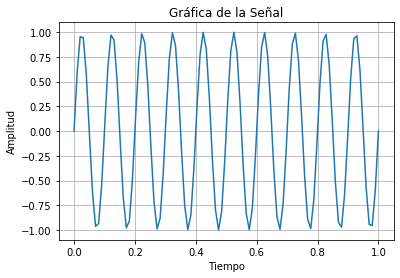

In [1]:
import numpy as np
import matplotlib.pyplot as plot
from scipy import signal
# Vector de tiempo (valor_inicial, valor_final, muestras)
# por ejemplo se tienen 100 muestras/segundo
f_muestreo = 100
tiempo = np.linspace(0,1,f_muestreo, endpoint=True)
# Valor de la frecuencia en Hz
freq = 10
# Funciones con numpy y scipy
amplitud = np.sin(2 * np.pi * freq * tiempo) # Seno
# amplitud = np.cos(2 * np.pi * freq * tiempo) # Coseno
# amplitud = signal.square(2 * np.pi * freq * tiempo) # Tren de pulsos
# Obtención del Gráfico
plot.plot(tiempo, amplitud)
# Cambio de los atributos
plot.title('Gráfica de la Señal')
plot.xlabel('Tiempo')
plot.ylabel('Amplitud')
plot.grid(True, which='both')



### Obtención del espectro de la señal generada
El espectro de una señal se refiere a la distribución de la energía de la señal en el dominio de la frecuencia. Para señales digitales se emplean funciones discretas, en este caso se va a usar la transformada rapida de Fourier **FFT** en tiempo discreto con la ayuda de la librería **scipy**.

/home/nelson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


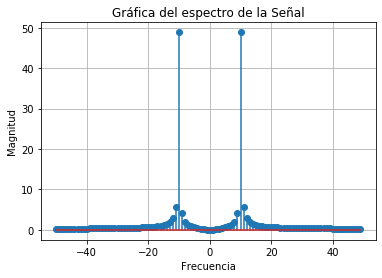

In [2]:
from scipy import fftpack
'''
Con la ayuda de fftpack de obtiene la magnitud y las frecuencias
de la trasformada rápida de Fourier
'''
# Vector de la magnitud (amplitud_señal) 
# Posee valores reales y complejos
esp = np.abs(fftpack.fft(amplitud))
# Vector de las frecuencias
# Entrega valores normalizados
f_esp = fftpack.fftfreq(len(esp)) * f_muestreo
# Obtención del Gráfico
plot.stem(f_esp, esp)
# Cambio de los atributos
plot.title('Gráfica del espectro de la Señal')
plot.xlabel('Frecuencia')
plot.ylabel('Magnitud')
plot.grid(True, which='both')




### Manipulación de imágenes
Las imágenes digitales se representan en forma de matrices con las magnitudes que representan a los componentes **rgb** de cada pixel. Python aprovecha de sus capacidades para hacer cálculo matemáticos complejos conla finalidad de extraer información contenida en las imágenes.
Primero se abre la imagen de la siguiente manera:

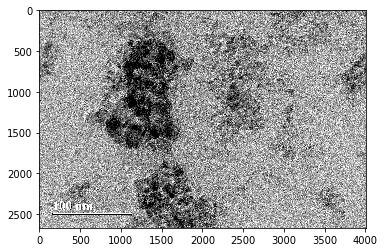

In [49]:
# Módulo para abrir imágenes
from PIL import Image
im = Image.open('Imagenes_nanoparticulas/Diamante-01.tif')
imarreglo = np.array(im) # Componentes de los pixeles
#print(imarreglo)
#im.show()
# cmap es el mapa de colores
plot.imshow(imarreglo, cmap = 'gray') 

Una vez que ya se tenga los valores digitales de la imagen se puede empezar a manipular dicha imagen. Se usa la librería **skimage** para realizar los filtrados


Text(0.5, 1.0, 'Imagen con Filtro de Gauss')

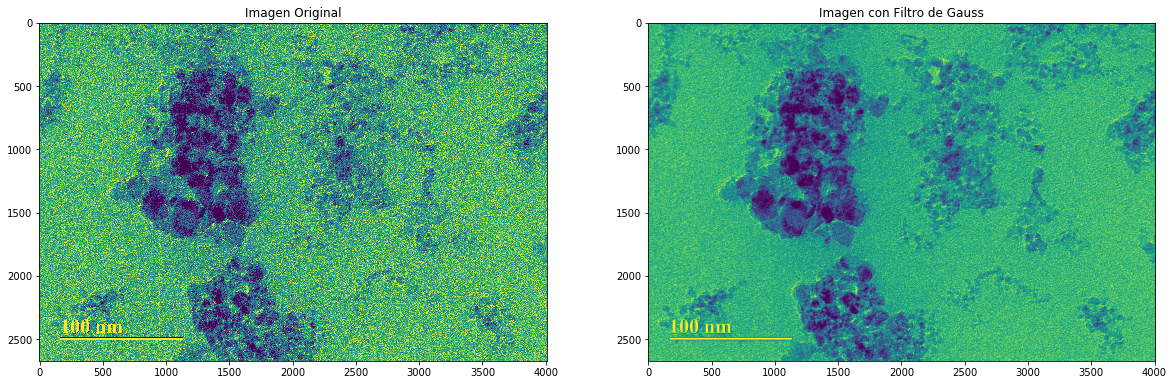

In [79]:
from skimage import filters
'''   Filtro de Gauss
(nombre_del_arreglo, sigma)
sigma = escalar que afecta al cálculo
de la desviación estándar
 '''
imagen_gauss = filters.gaussian(imarreglo, 3)
# Graficar varias figuras
fig = plot.figure(figsize=(20, 50))
a = fig.add_subplot(1, 2, 1) #(fil,col,pos)
imgplot = plot.imshow(imarreglo, interpolation='nearest')
a.set_title('Imagen Original')
a = fig.add_subplot(1, 2, 2)
imgplot =plot.imshow(imagen_gauss, interpolation='nearest')
a.set_title('Imagen con Filtro de Gauss')



In [2]:
# disk permite controlar la ejecución del filtro
from skimage.morphology import disk
'''Ecualización del filtro rank
Permite obtener una aproximación de profundidad
'''
imagen_canny = filters.rank.equalize(imagen_gauss, disk(100))

fig = plot.figure(figsize=(20, 50))
a = fig.add_subplot(1, 2, 1) #(fil,col,pos)
imgplot =plot.imshow(imagen_gauss, interpolation='nearest')
a.set_title('Imagen con Filtro de Gauss')
a = fig.add_subplot(1, 2, 2)
imgplot =plot.imshow(imagen_canny, interpolation='nearest', cmap ='hot')
a.set_title('Extracción de Nanoestructuras')

NameError: name 'filters' is not defined